In [69]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# **1 BUSSINESS UNDERSTANDING**

The dataset you are working with comes from the Centers for Medicare & Medicaid Services (CMS), a U.S. federal agency responsible for managing healthcare programs like Medicare and Medicaid. Specifically, this dataset provides information about dentist office visit costs for both new and established patients across various zip codes in the United States.

**Objective:**
To segment zip_code areas into meaningful clusters based on healthcare-related pricing and copay data. This analysis aims to uncover patterns or similarities between areas to support better decision-making in pricing strategies or resource allocation.

**Key Questions:**

1. Are there patterns in dental costs across different zip codes?
2. How many distinct groups (clusters) can we identify?
3. Can we generalize these clusters for future predictions?


# **2 DATA UNDERSTANDING**

## 2.1 Import Libraries

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

## 2.2 Load the Dataset

In [71]:
# Load the data
file_path = '/content/Dentist.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42966 entries, 0 to 42965
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   zip_code                                              42966 non-null  int64  
 1   min_medicare_pricing_for_new_patient                  42966 non-null  float64
 2   max_medicare_pricing_for_new_patient                  42966 non-null  float64
 3   mode_medicare_pricing_for_new_patient                 42966 non-null  float64
 4   min_copay_for_new_patient                             42966 non-null  float64
 5   max_copay_for_new_patient                             42966 non-null  float64
 6   mode_copay_for_new_patient                            42966 non-null  float64
 7   most_utilized_procedure_code_for_new_patient          42966 non-null  int64  
 8   min_medicare_pricing_for_established_patie

,zip_code,min_medicare_pricing_for_new_patient,max_medicare_pricing_for_new_patient,mode_medicare_pricing_for_new_patient,min_copay_for_new_patient,max_copay_for_new_patient,mode_copay_for_new_patient,most_utilized_procedure_code_for_new_patient,min_medicare_pricing_for_established_patient,max_medicare_pricing_for_established_patient,mode_medicare_pricing_for_established_patient,min_copay_for_established_patient,max_copay_for_established_patient,mode_copay_for_established_patient,most_utilized_procedure_code_for_established_patient
0,210,57.752,174.264,89.144,14.438,43.566,22.286,99203,18.704,142.152,71.856,4.676,35.538,17.964,99213
1,211,57.752,174.264,89.144,14.438,43.566,22.286,99203,18.704,142.152,71.856,4.676,35.538,17.964,99213
2,212,57.752,174.264,89.144,14.438,43.566,22.286,99203,18.704,142.152,71.856,4.676,35.538,17.964,99213
3,213,57.752,174.264,89.144,14.438,43.566,22.286,99203,18.704,142.152,71.856,4.676,35.538,17.964,99213
4,214,57.752,174.264,89.144,14.438,43.566,22.286,99203,18.704,142.152,71.856,4.676,35.538,17.964,99213


## 2.3 Check for Missing or Outlier Values


Missing Values:
zip_code                                                0
min_medicare_pricing_for_new_patient                    0
max_medicare_pricing_for_new_patient                    0
mode_medicare_pricing_for_new_patient                   0
min_copay_for_new_patient                               0
max_copay_for_new_patient                               0
mode_copay_for_new_patient                              0
most_utilized_procedure_code_for_new_patient            0
min_medicare_pricing_for_established_patient            0
max_medicare_pricing_for_established_patient            0
mode_medicare_pricing_for_established_patient           0
min_copay_for_established_patient                       0
max_copay_for_established_patient                       0
mode_copay_for_established_patient                      0
most_utilized_procedure_code_for_established_patient    0
dtype: int64


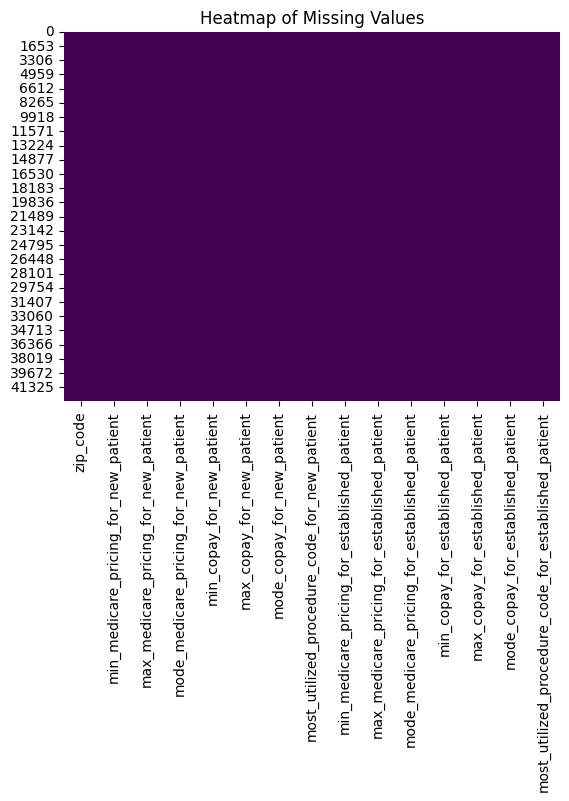

In [72]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values as a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

## 2.4 Explore Variable Distributions

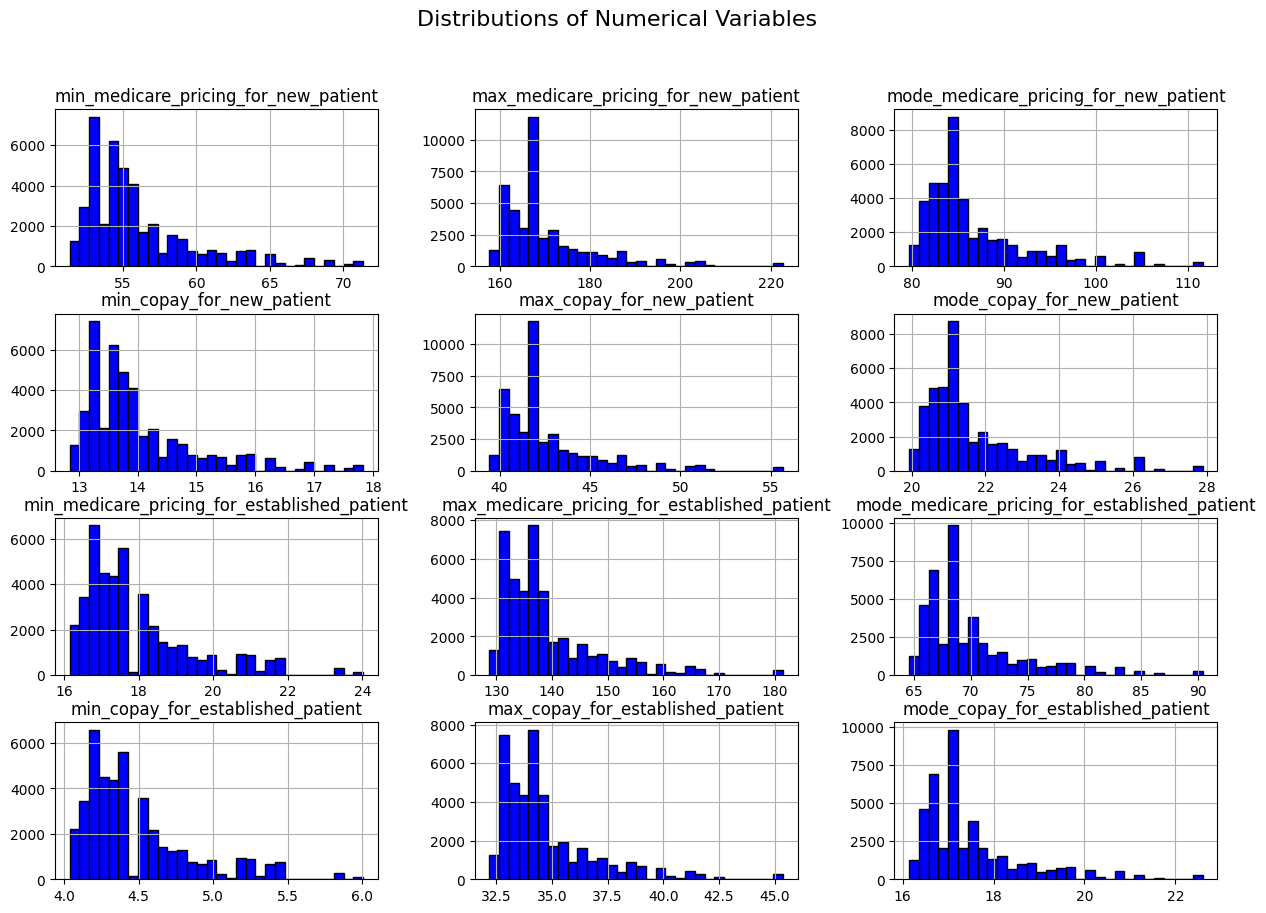

In [73]:
# Plot distributions for numerical columns
df.select_dtypes(include=["float64"]).hist(figsize=(15, 10), bins=30, color="blue", edgecolor="black")
plt.suptitle("Distributions of Numerical Variables", fontsize=16)
plt.show()


## 2.5 Relationships Between Variables

In [74]:
# Correlation matrix
df.corr()

,zip_code,min_medicare_pricing_for_new_patient,max_medicare_pricing_for_new_patient,mode_medicare_pricing_for_new_patient,min_copay_for_new_patient,max_copay_for_new_patient,mode_copay_for_new_patient,most_utilized_procedure_code_for_new_patient,min_medicare_pricing_for_established_patient,max_medicare_pricing_for_established_patient,mode_medicare_pricing_for_established_patient,min_copay_for_established_patient,max_copay_for_established_patient,mode_copay_for_established_patient,most_utilized_procedure_code_for_established_patient
zip_code,1.000000,0.008327,-0.010241,-0.016212,0.008327,-0.010241,-0.016212,NaN,0.039935,0.008740,0.008826,0.039935,0.008740,0.008826,NaN
min_medicare_pricing_for_new_patient,0.008327,1.000000,0.991190,0.994985,1.000000,0.991190,0.994985,NaN,0.982807,0.995620,0.998779,0.982807,0.995620,0.998779,NaN
max_medicare_pricing_for_new_patient,-0.010241,0.991190,1.000000,0.998409,0.991190,1.000000,0.998409,NaN,0.949839,0.997986,0.995814,0.949839,0.997986,0.995814,NaN
mode_medicare_pricing_for_new_patient,-0.016212,0.994985,0.998409,1.000000,0.994985,0.998409,1.000000,NaN,0.960204,0.996765,0.996948,0.960204,0.996765,0.996948,NaN
min_copay_for_new_patient,0.008327,1.000000,0.991190,0.994985,1.000000,0.991190,0.994985,NaN,0.982807,0.995620,0.998779,0.982807,0.995620,0.998779,NaN
max_copay_for_new_patient,-0.010241,0.991190,1.000000,0.998409,0.991190,1.000000,0.998409,NaN,0.949839,0.997986,0.995814,0.949839,0.997986,0.995814,NaN
mode_copay_for_new_patient,-0.016212,0.994985,0.998409,1.000000,0.994985,0.998409,1.000000,NaN,0.960204,0.996765,0.996948,0.960204,0.996765,0.996948,NaN
most_utilized_procedure_code_for_new_patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_medicare_pricing_for_established_patient,0.039935,0.982807,0.949839,0.960204,0.982807,0.949839,0.960204,NaN,1.000000,0.963885,0.973968,1.000000,0.963885,0.973968,NaN
max_medicare_pricing_for_established_patient,0.008740,0.995620,0.997986,0.996765,0.995620,0.997986,0.996765,NaN,0.963885,1.000000,0.999022,0.963885,1.000000,0.999022,NaN


# **3 DATA PREPARATION**

## 3.1 Select Relevant Features
We exclude columns that are not useful for clustering (e.g., zip_code, constant values).

In [75]:
# Select relevant features
features = df.drop(columns=[
    'zip_code',  # Not used directly for clustering
    'most_utilized_procedure_code_for_new_patient',
    'most_utilized_procedure_code_for_established_patient'
])

## 3.2 Scale the Data
Clustering algorithms are sensitive to the scale of the data. We standardize the features to ensure fair contribution from all variables.

In [76]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


## 3.3 Train-Test Split


In [77]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


## 3.4 Optional: Dimensionality Reduction with PCA


In [81]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Display the explained variance ratio
print("\nExplained Variance Ratio by PCA:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio by PCA:
[0.98866502 0.01074753]


# **4 MODELING**

## 4.1 Determine Optimal Number of Clusters

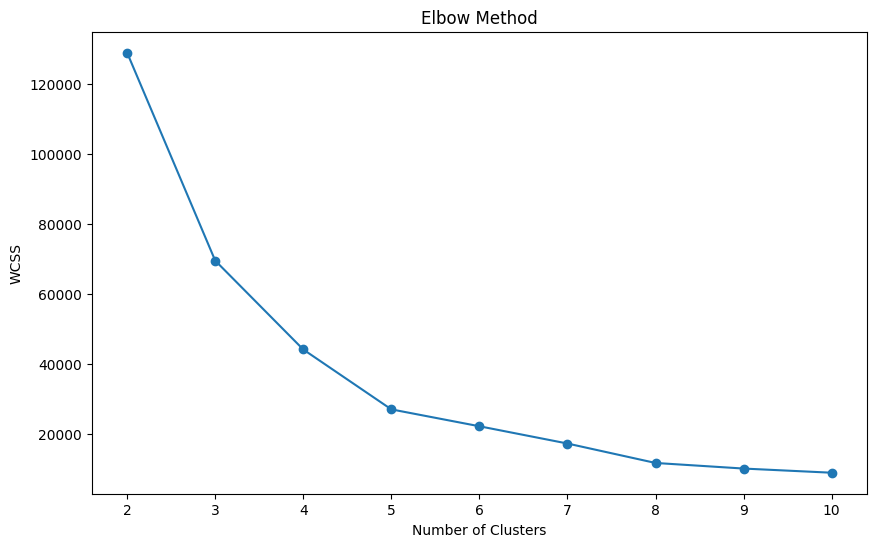

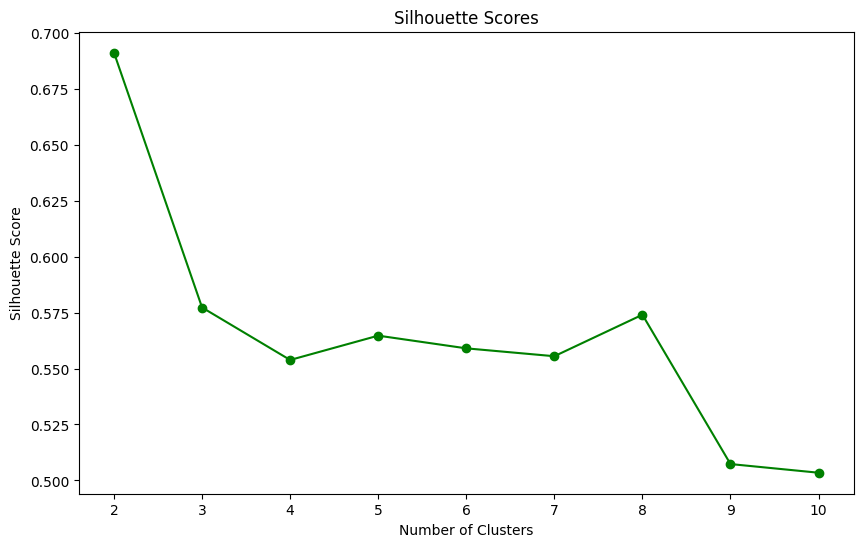

In [82]:
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", color="green")
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

## 4.2 Fit KMeans with Optimal Clusters

In [83]:
# Fit KMeans with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train)

# Predict clusters for training and testing sets
train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test)


# **5 EVALUATION**

## 5.1 Evaluate Cluster Quality

In [84]:
# Silhouette score for training set
train_silhouette = silhouette_score(X_train, train_labels)
print(f"Silhouette Score (Train): {train_silhouette:.2f}")

# Silhouette score for testing set
test_silhouette = silhouette_score(X_test, test_labels)
print(f"Silhouette Score (Test): {test_silhouette:.2f}")

Silhouette Score (Train): 0.55
Silhouette Score (Test): 0.55


## 5.2 Visualize Clusters

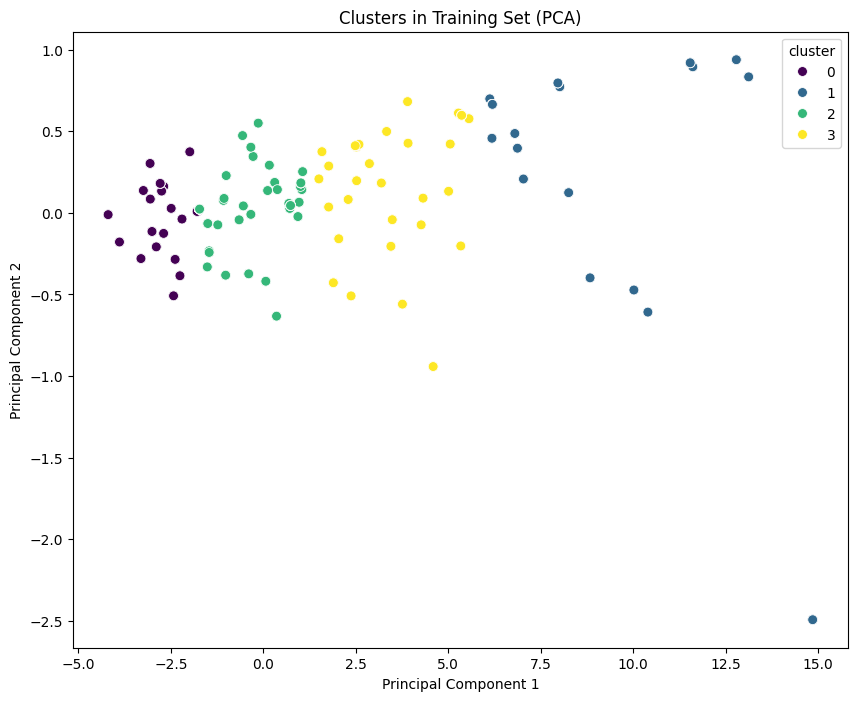

In [85]:
# Visualize clusters in the training set using PCA
df_train_pca = pd.DataFrame(X_train_pca, columns=["pca1", "pca2"])
df_train_pca["cluster"] = train_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train_pca, x="pca1", y="pca2", hue="cluster", palette="viridis", s=50)
plt.title("Clusters in Training Set (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

##5.3 Cluster Summaries

In [86]:
# Add cluster labels to the original data
df["cluster"] = kmeans.predict(X_scaled)

# Summarize features by cluster
cluster_summary = df.groupby("cluster").mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
             zip_code  min_medicare_pricing_for_new_patient  \
cluster                                                       
0        49833.707903                             52.870129   
1        49433.204196                             65.697323   
2        49547.896832                             55.278080   
3        49309.768222                             59.522930   

         max_medicare_pricing_for_new_patient  \
cluster                                         
0                                  161.969066   
1                                  196.788355   
2                                  168.318229   
3                                  179.539408   

         mode_medicare_pricing_for_new_patient  min_copay_for_new_patient  \
cluster                                                                     
0                                    82.113776                  13.217532   
1                                   101.077818                  16.424331   


     
# **6 FINAL CONCLUSION**

1. **Do the clusters make sense?**  
   * Yes, the differences in costs and copayments between clusters appear to reflect real patterns across zones.

2. **What defines each cluster?**  
   * Cluster 0: Economic zones with low costs.  
   * Cluster 1: Intermediate zones.  
   * Cluster 2: High-cost zones.  
   * Cluster 3: Areas with low costs but slightly different characteristics compared to Cluster 0.

3. **Is the model robust?**  
   * The results in both training and testing are consistent, indicating that the model generalizes well.

4. **What relevant patterns can we leverage?**  
   * The clusters can be used to segment postal codes for pricing strategies, healthcare planning, or cost analysis.
